# Netflix Data: Cleaning, Analysis and Visualization

## Project Description
Netflix is one of the largest streaming platforms offering movies and TV shows
worldwide. This project focuses on cleaning, analyzing, and visualizing Netflix
content data to understand content distribution, popular genres, ratings,
countries, and release trends over time.

## Objectives
- Clean and preprocess Netflix dataset
- Analyze Movies vs TV Shows distribution
- Identify popular genres and ratings
- Analyze content trends over years and months
- Visualize key insights using charts

## Tools Used
- Python
- Pandas
- NumPy
- Matplotlib
- Seaborn


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud

pd.set_option('display.max_columns', None)


In [4]:
data = pd.read_csv('netflix1.csv')
data.head()


,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [5]:
data.shape


(8790, 10)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [7]:
data.isnull().sum()


show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

In [9]:
# Remove duplicates
data.drop_duplicates(inplace=True)

# Drop rows with missing important values
data.dropna(subset=['director', 'country'], inplace=True)

# Convert date_added to datetime
data['date_added'] = pd.to_datetime(data['date_added'])


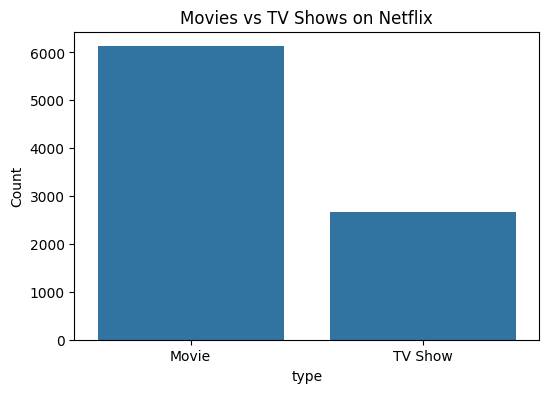

In [10]:
type_counts = data['type'].value_counts()

plt.figure(figsize=(6,4))
sns.barplot(x=type_counts.index, y=type_counts.values)
plt.title('Movies vs TV Shows on Netflix')
plt.ylabel('Count')
plt.show()


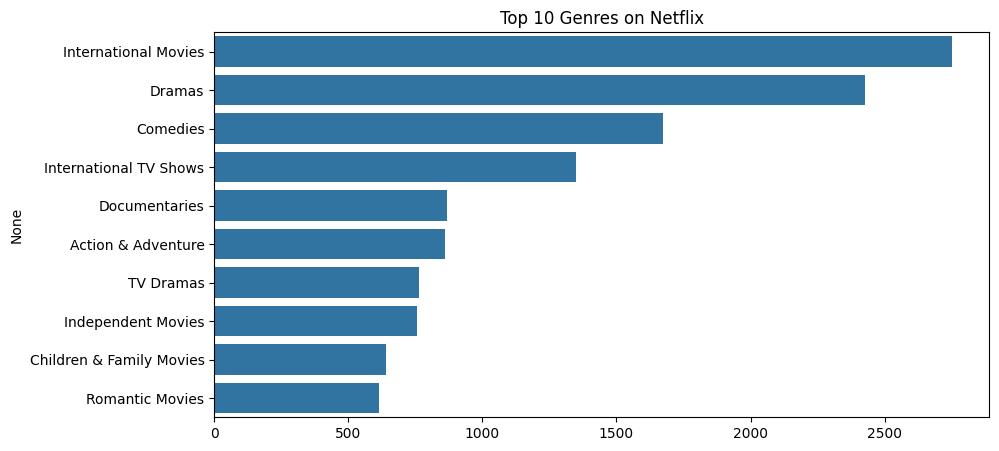

In [11]:
data['genres'] = data['listed_in'].apply(lambda x: x.split(', '))
all_genres = sum(data['genres'], [])
genre_counts = pd.Series(all_genres).value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=genre_counts.values, y=genre_counts.index)
plt.title('Top 10 Genres on Netflix')
plt.show()


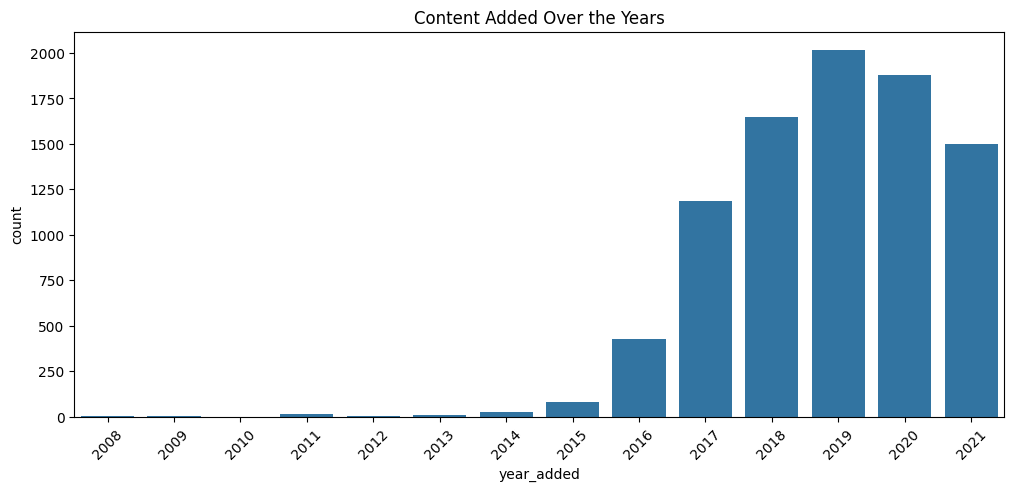

In [12]:
data['year_added'] = data['date_added'].dt.year

plt.figure(figsize=(12,5))
sns.countplot(x='year_added', data=data)
plt.xticks(rotation=45)
plt.title('Content Added Over the Years')
plt.show()


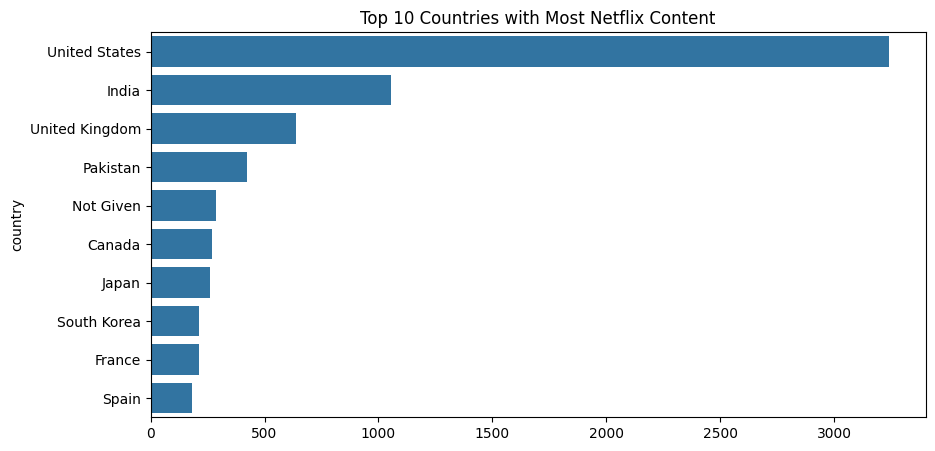

In [13]:
top_countries = data['country'].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_countries.values, y=top_countries.index)
plt.title('Top 10 Countries with Most Netflix Content')
plt.show()


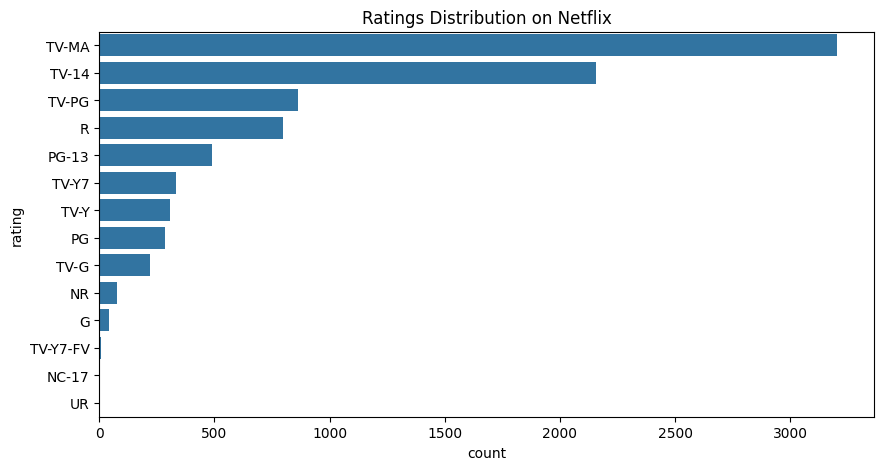

In [14]:
plt.figure(figsize=(10,5))
sns.countplot(y='rating', data=data,
              order=data['rating'].value_counts().index)
plt.title('Ratings Distribution on Netflix')
plt.show()


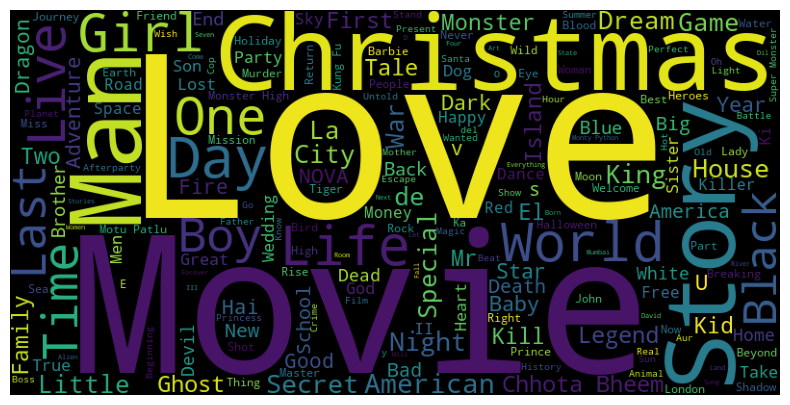

In [15]:
movie_titles = data[data['type'] == 'Movie']['title']

wordcloud = WordCloud(
    width=800, height=400, background_color='black'
).generate(' '.join(movie_titles))

plt.figure(figsize=(10,5))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()


## Conclusion

This project successfully cleaned and analyzed Netflix content data to uncover
key insights related to content type distribution, popular genres, ratings,
countries, and release trends.

The analysis shows that Netflix has more movies than TV shows, with drama and
international content being the most popular genres. The United States and
India contribute the highest amount of content, and Netflix content additions
have increased significantly in recent years.

This project demonstrates strong data cleaning, exploratory analysis, and
visualization skills using real-world data.
